# XML

Die E**x**tensible **M**arkup **L**anguage ist ein Format und eine Metasprache für (primär) hierarchische Daten. Da XML in einigen anderen Lehrveranstaltungen verwendet wird, gehe ich hier nicht näher darauf ein, sondern möchte nur kurz zeigen, wie man XML mit Python verarbeiten und erzeugen kann.

## XML Bibliotheken in Python

Die in der Standardbibliothek vorhandenen XML-Bibliotheken finden sich im Package xml. Diese sind:
    
* **dom.sax** - liest XML als Datenstrom ein und generiert Events um z.B. auf bestimmte Tags zu reagieren. Dieses Modul wird        vor allem verwendet, um riesige XML-Dokumente zu        verarbeiten, ohne dabei viel RAM zu verbrauchen.
* **xml.dom.minidom** - Macht ein XML-Dokument als **D**ocument-**O**bjekt-**M**odel verfügbar. Das DOM ist eine abstrakte Sichtweise und        API auf ein XML-Dokument, das von vielen Programmiersprachen unterstützt wird. DOM spielt z.B. beim Zugriff von JavaScript auf HTML eine große Rolle.
* **xml.dom.pulldom** ist eine etwas exotische Zwischenlösung zwischen SAX und DOM, mit einem sehr überschaubaren Einsatzbereich.
* **xml.etree.ElementTree** ist eine sehr "pythonische" Art, XML zu        verarbeiten. Es ist von der Idee her mit DOM vergleichbar, bietet aber ein einfacheres Interface.

## Zusatzbibliotheken
Hier ist vor allem `lxml` (http://lxml.de/) zu erwähnen. `lxml` ist so etwas wie der größere, klügere und stärkere Bruder von `xml.etree.ElementTree` . Beide sind jedoch so ähnlich, dass man, wenn man `xml.etree.ElementTree` verwendet hat, mit minimalen Codeänderungen auf `lxml` umsteigen kann. Der Hauptunterschied ist einerseits die Verarbeitungsgeschwindigkeit und die Unterstützung von XPath, die in `lxml` im Unterschied zu `etree` vollständig implementiert ist. `lxml` bietet darüber hinaus noch ein Reihe weiterer Möglichkeiten, etwa zum Parsen von HTML.
        
    

In der Folge werden wir auf ElementTree fokusieren, weil dies die gebräuchlichste  Art ist, XML-Daten mit Python zu verarbeiten und weitgehend gleich verwendet wird, wie das mächtigere lxml.

Im Anhang werde ich noch kurze Beispiele für die anderen Möglichkeiten geben.


## Die Beispieldaten

Wir verwenden hier sehr einfache Daten, die hoffentlich einfach zu verstehen sind. Dabei handelt es sich um eine kurze Rezeptsammlung.

In XML sind Daten baumförmig organisiert. Ein Wurzelelement (hier: `<recipes>`) enthält ein oder mehrere Kindelement, die wiederum Kindelemente enthalten können. Im Beispiel kann das Wurzelement `<recipes>` beliebig viele `<recipe>`-Elemente enthalten. Jedes `<recipe>`-Element enthält wiederum diese Elemente: `<title>`, `<coocingTime>`, `<ingredients>` und `<instructions>` usw. 

Man kann sich diese Struktur wie eine Menge ineinander steckender Behälter vorstellen:

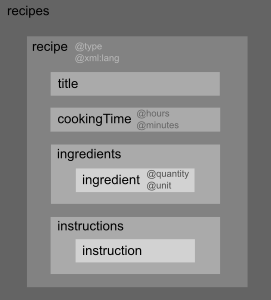

oder auch als Baum, ähnlich etwa einer Verzeichnisstruktur:

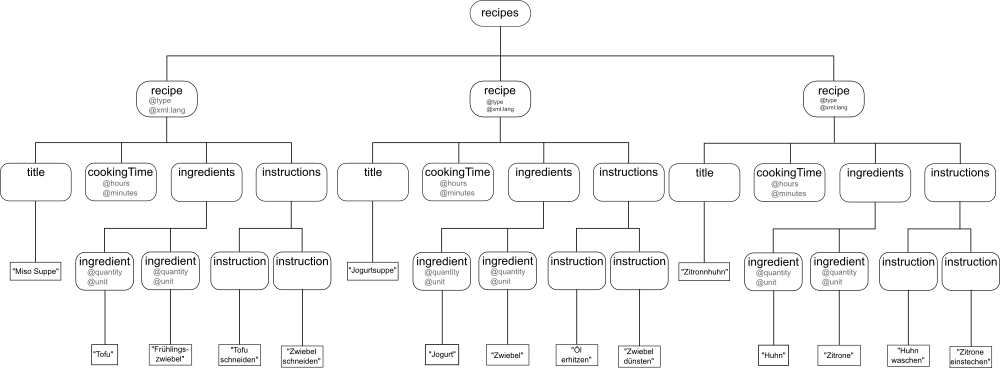

Wichtig ist auch noch, dass Elemente Attribute haben können. Beispielsweise wird das verwendet, um jedem Rezept einen `type` und eine Sprache (`xml:lang`) zuzuweisen:

~~~
<recipe type="soup" xml:lang="de">
~~~

Die gesamte XML-Datei finden Sie hier: `../data/formate/recipes.xml`

## Die XML-Datei einlesen

Wir werden ins bei den folgenden Beispiel mit `etree` begnügen. Die Beispiele sollten aber mit kleinen Änderungen auch mit lxml funktionieren. 

Zunächst müssen wir das Modul importieren. Um nicht immer den langen Modulnamen eintippen zu müssen, importieren wir das Modul unter dem Namen ET:

In [ ]:
import xml.etree.ElementTree as ET

Dann lesen wir die XML-Datei ein und weisen das dabei erzeugte ElementTree-Objekt der Variable `tree` zu:

In [ ]:
tree = ET.parse('../data/formate/recipes.xml')

Um im Baum navigieren zu können, brauchen wir seine Wurzel:

In [ ]:
root = tree.getroot()

Dann können wir uns das Wurzel-Objekt `root` genauer ansehen:

In [ ]:
type(root)

## Das Element-Objekt
root ist also ein Element-Objekt, d.h. ein Objekt vom Typ `Element`. Dieses hat drei wichtige Eigenschaften:

* `tag` repräsentiert den Tag-Namen des Elements
* `text` repräsentiert den Text-Knoten, der dem Element unmittelbar untergeordnet ist. Dieser kann leer sein.
* `attrib` ist ein Dictionary mit allen Attributen des XML-Elements.

In [ ]:
root.tag

Das Wurzelelement ist also mit `recipes` getaggt, wie wir auch unschwer aus der oben stehenden Grafik erkennen können.

In [ ]:
root.text

Unser Wurzelelement enthält keinen richtigen Text, sondern nur einen Zeilenumbruch und ein Tabulatorzeichen, die sich daraus ergeben, dass in der XML-Datei zwischen `<recipes>` und `<recipe>` genau diese beiden Zeichen stehen. Wir werden später an einem anderen Element ein sinnvolleres Beispiel für die `text`-Eigenschaft sehen.

In [ ]:
root.attrib

Wir sehen hier, dass die Attribute eines Elements als Dictionary verfügbar sind. Das für das Element `recipes` kein Attribut definiert ist, besteht die Eigenschaft `attrib` aus einem leeren Dictionary.

### Kindelemente

Von jedem beliebigen Element aus können wir auf seine Kindelemente zugreifen.

In [ ]:
for child in root:
    print(child)

In [ ]:
len(root)

Die Kindelemente stehen also über einen Iterator zur Verfügung und können bei Bedarf in eine Liste umgewandelt werden (was aber nur selten nötig sein wird):


In [ ]:
list(root)

`len(element)` liefert die Zahl der Kindelemente:

Über den Index 0 kann man auf das erste Kindelement direkt zugreifen:

In [ ]:
recipe1 = root[0]

Das Kindelement `recipe1` ist wieder ein Element-Objekt mit den schon bekannten Eigenschaften:

In [ ]:
recipe1.tag

In [ ]:
recipe1.attrib

Hier haben wir 2 Attribute: `type` und `xml:lang`, wobei der Namespace `xml` automatisch zur vollen URI des Namespaces expandiert wird: `http://www.w3.org/XML/1998/namespace}lang`.

Um direkt auf den Wert eines bestimmten Attributs zuzugreifen bietet `Element` die `get`-Methode:

In [ ]:
recipe1.get('type')

Greift man auf ein nicht existierendes Attribut zu, liefert `get()` None:

In [ ]:
print(recipe1.get('hudriwurdri'))

### Auf bestimmte Elemente zugreifen
#### find()
Sehen wir uns einmal die Kindelemente von `recipe1` an:

In [ ]:
for child in recipe1:
    print(child.tag)

Das Element hat also vier Kindelemente. Wollen wir auf ein bestimmtes Kindelement zugreifen, können wir die `find(<gesuchter_tag>)` Methode nutzen. Sie liefert das erste unmittelbare Kindelement mit dem angegebenen Tag-Namen:

In [ ]:
recipe1.find('title')

Wir können auch direkt auf die Text-Eigenschaft des gefundenen Elements zugreifen:

In [ ]:
recipe1.find('title').text

Mit diesen Mitteln könnten wir uns bereits eine Übersicht über die vorhanden Rezepte verschaffen:

In [ ]:
for recipe in root:
    print(recipe.find('title').text)

#### findall()
Während `find()` nur das erste gesuchte Kindelement liefert, findet `findall()` alle direkten Kindelemente mit dem gesuchten Tag.

In [ ]:
recipe1.findall('title')

Da es pro Rezept nur ein `title`-Element gibt, bekommen wir eine Liste mit nur einem Eintrag. Interessanter wird es, wenn wir `findall()` auf das Element `ingredients` anwenden:

In [ ]:
recipe1.find('ingredients').findall('ingredient')

`ingredients` hat also 4 Kindelemente vom Typ `ingredient`.

Anstatt nur die Elemente auszugeben, können wir das nutzen um eine Liste aller Zutaten zu erzeugen:

In [ ]:
for ingredient in recipe1.find('ingredients').findall('ingredient'):
    print(f"{ingredient.get('quantity', '')} {ingredient.get('unit', '')} {ingredient.text}")

#### iter()
Die Methoden `find()` und `findall()` durchsuchen nur die direkten Kindelemente. Wenn wir sie vom Element `recipe1` aus anwenden, um nach `ingredient` zu suchen, wird nichts gefunden, weil das Element `ingredients` dazwischen liegt:

In [ ]:
recipe1.findall('ingredient')

Wollen wir tiefer als eine Ebene suchen, brauchen wir die Methode `iter()`. Diese liefert einen Iterator, der ein Element nach dem anderen liefert:

In [ ]:
for ingredient in recipe1.iter('ingredient'):
    print(ingredient.text)

Damit können wir auch alle Zutaten für alle Rezepte sehr einfach ausgeben, weil `iter()` alle Elemente beliebig tief in der Struktur findet:

In [ ]:
for ingredient in root.iter('ingredient'):
    print(ingredient.text)

## XPath
XPath ist eine Sprache, die es erlaubt, Zugriffspfade auf ein oder mehrere XML-Elemente zu definieren. ElementTree unterstützt XPath, allerdings unvollständig (mehr dazu hier: https://docs.python.org/3/library/xml.etree.elementtree.html#elementtree-xpath). 
Da lxml XPath (Vers. 1.0) vollständig unterstützt, empfiehlt sich für komplexere Aufgaben die Verwendung von [lxml](https://lxml.de/xpathxslt.html) anstelle von ElementTree. Falls aktuellere Versionen benötigt werden, können die Python-Bindings von Saxon verwendet werden: https://www.saxonica.com/saxon-c/doc/html/saxonc.html. Diese sind jedoch nicht mit ElementTree kompatibel.

Das letzte Beispiel ließe sich unter Verwendung von XPath auch so schreiben:

In [ ]:
for ingredient in root.findall('./recipe/ingredients/ingredient'):
    print(ingredient.text)

oder kürzer (aber langsamer) so:

In [ ]:
for ingredient in root.findall('.//ingredient'):
    print(ingredient.text)

Sind wird nur an den Zudaten für Desserts interessiert, können wir nach dem Wert des Attributs `type` im Element `recipe` filtern:

In [ ]:
for ingredient in root.findall('./recipe[@type="dessert"]/ingredients/ingredient'):
    print(ingredient.text)

Selbstverständlich können wir von jedem gefundenen Element aus weiter durch den Pfad navigieren. Hier suchen wir zunächst via XPath alle Rezepte des Typs `dessert`. Von jedem gefundenen Rezept-Element aus verwenden wir einene weiteren XPath-Ausdruck, um den Title des Rezepts auszugeben und einen zweiten Xpath, um zu den Zudaten des Rezepts zu navigieren.

In [ ]:
for recipe in root.findall('./recipe[@type="dessert"]'):
    print(recipe.find('./title').text)
    for ingredient in recipe.findall('./ingredients/ingredient'):
        print(f"\t{ingredient.text}")

lxml unterstützt neben XPath noch weitere Methoden wie `getprevious()` `getnext()` oder `getparent()` um durch den Baum zu navigieren.

## Daten verändern
### Attribute und Text verändern
ElementTree unterstützt natürlich auch die Veränderung von Daten. Wir können beispielsweise die Bezeichnung 'grams' auf 'Gramm' ändern. Suchen wir zunächst via XPath nach allen `ingredient`-Elementen, in denen dieser Wert vorkommen:

In [ ]:
for ingredient in root.findall('./recipe/ingredients/ingredient[@unit="grams"]'):
    print(ingredient.attrib)

In [ ]:
for ingredient in root.findall('./recipe/ingredients/ingredient[@unit="grams"]'):
    ingredient.set('unit', 'Gramm')

Zur Kontrolle können wir uns das ganze XML-Dokument ausgeben lassen:

In [ ]:
ET.tostring(root, encoding='utf-8')

oder in eine Datei schreiben lassen:

In [ ]:
tree.write('../output/rezepte_de.xml', encoding="utf-8")

Genauso wie die Attribute eines Elements, können wir die Text-Eigenschaft verändern:

In [ ]:
for ingredient in root.findall('./recipe/ingredients/ingredient'):
    ingredient.text = ingredient.text.replace('Erdäpfel', 'Kartoffel')
tree.write('output/rezepte_de.xml', encoding="utf-8")    

#### Löschen und Hinzufügen neuer Element

Natürlich unterstützt ElementTree auch das Erzeugen neuer Element-Objekte. Damit können wir das XML erweitern oder eine neue XML-Datei erzeugen.

In [ ]:
# Create a new `recipe` Element as child of `root` Element
new_recipe = ET.SubElement(root, 'recipe')

# Set some attributes
new_recipe.set('type', 'mainDish')
new_recipe.set('xml:lang', 'de')

# Add a `title` Element
title = ET.SubElement(new_recipe, 'title')
# Add a text node to the `title` element
title.text = 'Ravioli aus der Dose'

# Add an `ingreditents` Element as child element of `new_recipe`
ingredients = ET.SubElement(new_recipe, 'ingredients')

# Ad an `ingredient` Element as child element of `ingredients`
ingredient = ET.SubElement(ingredients, 'ingredient')

# Set attributes und text for `ingredient` Element
ingredient.set('quantity', '1')
ingredient.set('unit', 'pieces')
ingredient.text = 'Dose Ravioli'

In [ ]:
ET.dump(new_recipe)

## Sax und Minidom
Wie bereits beschrieben, gibt es weitere Möglichkeiten, mit Python XML zu verarbeiten. Wir sehen uns hier in aller Kürze zwei davon an.

### Sax
Sax ist eventbasiert und speicherschonend, weil nie das gesamte Dokument im Speicher gehalten werden muss. Man erzeugt einen Parser und weist diesem einen selbstgeschriebenen ContentHandler zu. Dann übergibt man dem Parser das zu parsende Dokument:

In [ ]:
import xml.sax as sax
parser = sax.make_parser()
parser.setContentHandler(RecipeHandler())
parser.parse('../data/formate/recipes.xml')

Dieser Code funktioniert noch nicht, weil wir zuerst den ContentHandler schreiben müssen:

In [ ]:
class RecipeHandler(sax.handler.ContentHandler):
    
    def __init__(self):
        self.in_title = False # set to True if we are inside a <title> Tag
        self.in_ingredient = False
        self.content = ''
        
    def startElement(self, name, attrs):
        "This method is called for each opening tag."
        if name == 'title':
            self.in_title = True
        if name == 'ingredient':
            self.in_ingredient = True

    def characters(self, content):
        "Content within tag markers"
        if self.in_title or self.in_ingredient:
            self.content = content
            
    def endElement(self, name):
        if name == 'title':
            self.in_title = False
            print(self.content)
        elif name == 'ingredient':
            self.in_ingredient = False
            print(f"\t{self.content}")
    

Nun funktioniert auch der bereits geschriebene Code:

In [ ]:
parser = sax.make_parser()
parser.setContentHandler(RecipeHandler())
parser.parse('../data/formate/recipes.xml')

### MiniDOM
Mit MiniDOM bietet Python eine Sichtweise auf XML-Daten die weitgehend konform mit dem vom World Wide Web Consortium definierten DOM (Document Object Model) ist, das weite Verbreitung hat und von vielen Programmiersprachen unterstützt wird. DOM ist im Vergleich zu ElementTree relativ umständlich und vor allem im Vergleich zu lxml (bei  großen Dokumenten) sehr langsam.
Sehen wir uns ein kleines Beispiel an:

In [ ]:
import xml.dom.minidom as minidom

tree = minidom.parse('../data/formate/recipes.xml')
for recipe in tree.getElementsByTagName('recipe'):
    title = recipe.getElementsByTagName('title')[0]
    print(title.firstChild.data)
    for ingredient in recipe.getElementsByTagName('ingredient'):
        print(f"\t{ingredient.firstChild.data}")

## Vertiefende Literatur
Ich empfehle ausdrücklich, mindestens eine der folgenden Ressourcen zur Vertiefung zu lesen!

  * Python Standard Library: XML Processing Modules
	(https://docs.python.org/3/library/xml.html).
  * The lxml.etree Tutorial 
    (https://lxml.de/tutorial.html).
  * Weigend: Kapitel 26.
  * Pilgrim: Kapitel 12
	(https://www.diveinto.org/python3/xml.html).
  * Kofler behandelt XML sehr knapp in Kapitel 14.6  
  

## Lizenz

This notebook ist part of the course [Grundlagen der Programmierung](https://github.com/gvasold/gdp) held by [Gunter Vasold](https://online.uni-graz.at/kfu_online/wbForschungsportal.cbShowPortal?pPersonNr=51488) at Graz University 2017&thinsp;ff. 

<p>
    It is licensed under <a href="https://creativecommons.org/licenses/by-nc-sa/4.0">CC BY-NC-SA 4.0</a>
</p>

<table>
    <tr>
    <td>
        <img style="height:22px" 
             src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"/></li>
    </td>
    <td>
    <img style="height:22px;"
         src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" /></li>
    </td>
    <td>
        <img style="height:22px;"
         src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1" /></li>
    </td>
    <td>
        <img style="height:22px;"
             src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" /></li>
    </td>
</tr>
</table>